# Auswertung

## 1. Quantitative Beobachtungen am Einzelspalt

<center><u>Tabelle 1:</u></center>

|Ordnung n|Min links* [px]|Abstand [px]|Min rechts* [px]|Abstand [px]|Min links [px]|Abstand [px]|Min rechts [px]|Abstand [px]|
|---------|--------------|------------|---------------|------------|--------------|------------|---------------|------------|
|1        |941.96        |82.06       |1106.35        |82.33       |944.8         |79.22       |1108.55        |84.53       |
|2        |860.21        |163.81      |1187.19        |163.17      |862.68        |161.34      |1188.74        |164.72      |
|3        |780.26        |243.76      |1271.64        |247.62      |780.08        |243.94      |1272.31        |248.29      |
|4        |698.52        |325.50      |1354.28        |330.26      |698.73        |325.29      |1355.70        |331.68      |
|5        |618.57        |405.45      |1433.33        |409.31      |619.69        |404.33      |1438.30        |414.28      |

wobei die mit * bezeichnete Werte aus der Messung indem der 0. Ordnungs Maximum in Sättigung war, sind.

## 2. Beugungstruktur des Doppelspaltes

Es wird zunächst mit Hilfe von Python ein Bild der theoretisch zu erwartenden Beugungsstruktur des Doppelspaltes berechnet und in Diagramm 1 angezeigt. Dabei wurden den Abstand der Spalte und der gemittelte Wert der zweier Spaltbreiten aus der Teil 4 des Messprotokolls. Sie betragen nun:
> Abstand der Spalte = $322.82 px$ <br>
> Spaltbreite = $130.47 px$<br>

Damit ergibt sich für den Verhäktnis des Spaltabstands zur Spaltbreite 2.47.

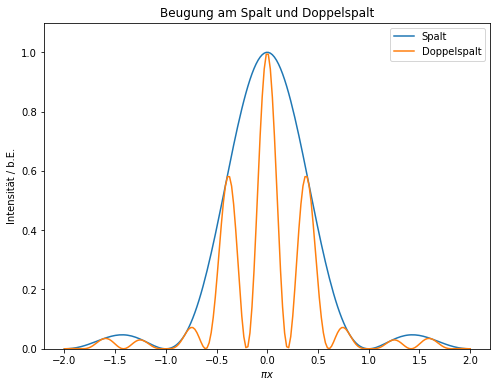

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def beugung_spalt(x):
    return np.sinc(x)**2

def beugung_doppelspalt(x):
    return np.sinc(x)**2*np.cos(np.pi*v*x)**2

#x=np.linspace(start,stop,steps)
#Anzahl der Nebenmaxima a
a=1
#Verhältnis Spaltabstand zur Spaltbreite v=Abstand/Breite
v=2.47

x=np.linspace(-(a+1),a+1,200)

plt.figure(figsize=(8,6))
plt.plot(x,beugung_spalt(x),label='Spalt')
plt.plot(x,beugung_doppelspalt(x),label='Doppelspalt')
plt.xlabel('$\pi x$')
plt.ylabel('Intensität / b.E.')
plt.title('Beugung am Spalt und Doppelspalt')
plt.ylim((0,1.1))
plt.legend()
#plt.savefig("figures/Beugung_spalt_doppelspalt.pdf", format="pdf")

## 3. Das Objektbild als Fouriersynthese des Beugungsbildes

Es werden mit Python die Bilder der ersten drei spezifischen Einstellungen des Analysierspaltes die entsprechenden Bilder berechnet.

(0, 1.1)

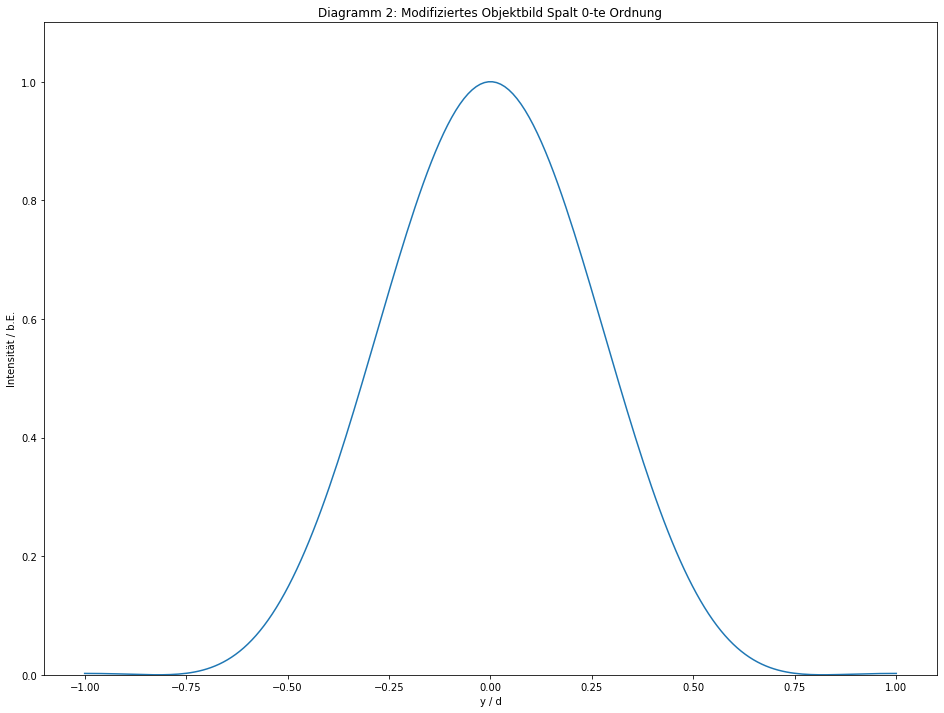

In [71]:
#Berechnung der modifizierten Spaltbilder
#Einzelspalt

#Integrand
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

#Spaltbreite auf 1
d = 1
#Integrationsbereich
n = 1

#Wähle doppelte Spaltbreite für y-Bereich; y-Werte:
Y = np.linspace(-1,1,200)*d

#Berechnung der resultierenden Objektbilds
from scipy.integrate import quad
f_modifiziert = []
for i in range(len(Y)):
    y = Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d)
    f_modifiziert.append(result**2)

#Kurve auf 1 normieren:
f_modifiziert = f_modifiziert/np.max(f_modifiziert)

plt.figure(figsize=(16,12))
plt.plot(Y, f_modifiziert)
plt.xlabel('y / d')
plt.ylabel('Intensität / b.E.')
plt.title('Diagramm 2: Modifiziertes Objektbild Spalt 0-te Ordnung')
plt.ylim((0,1.1))
#plt.savefig("figures/spalt.pdf", format="pdf")

(0, 1.1)

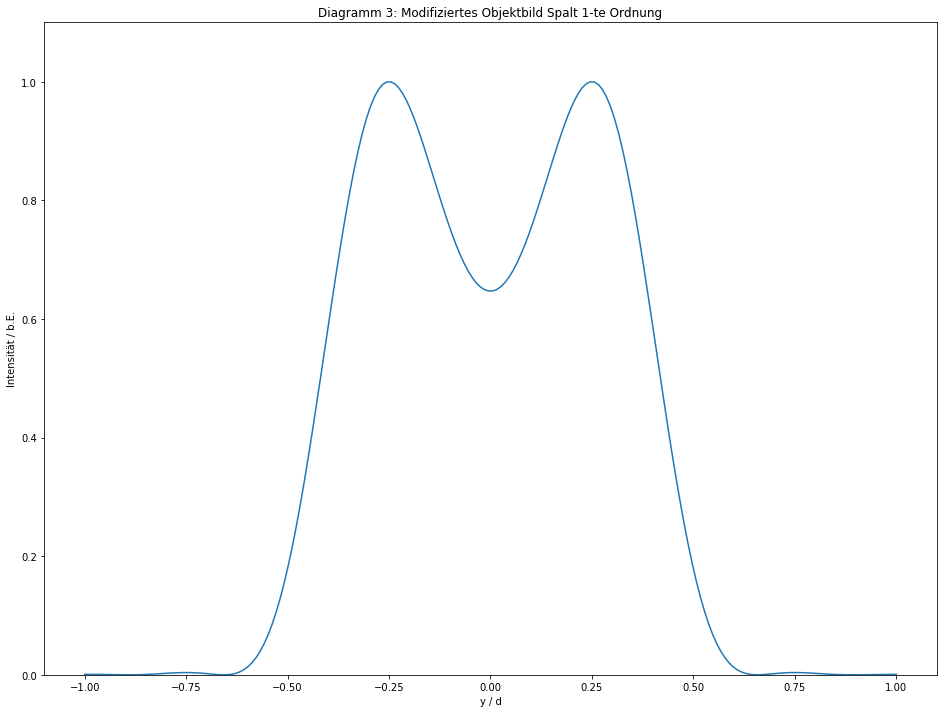

In [72]:
n = 2
Y = np.linspace(-1,1,200)*d

from scipy.integrate import quad
f_modifiziert = []
for i in range(len(Y)):
    y = Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d)
    f_modifiziert.append(result**2)
f_modifiziert = f_modifiziert/np.max(f_modifiziert)

plt.figure(figsize=(16,12))
plt.plot(Y, f_modifiziert)
plt.xlabel('y / d')
plt.ylabel('Intensität / b.E.')
plt.title('Diagramm 3: Modifiziertes Objektbild Spalt 1-te Ordnung')
plt.ylim((0,1.1))

(0, 1.1)

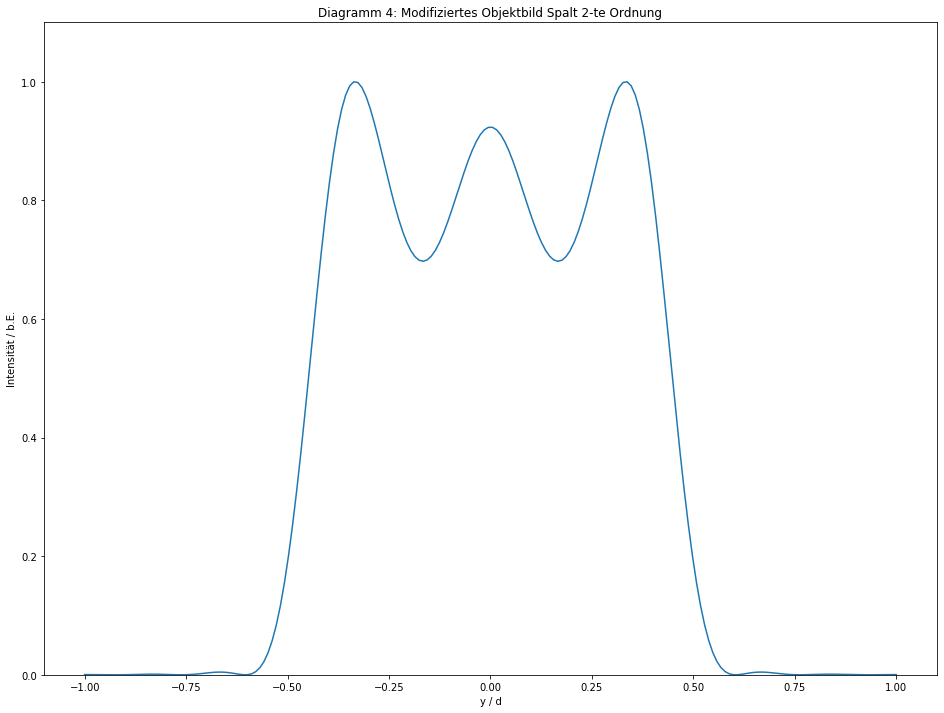

In [73]:
n = 3
Y = np.linspace(-1,1,200)*d

from scipy.integrate import quad
f_modifiziert = []
for i in range(len(Y)):
    y = Y[i]
    result, error = quad(spalt, 0, 2*np.pi*n/d)
    f_modifiziert.append(result**2)
f_modifiziert = f_modifiziert/np.max(f_modifiziert)

plt.figure(figsize=(16,12))
plt.plot(Y, f_modifiziert)
plt.xlabel('y / d')
plt.ylabel('Intensität / b.E.')
plt.title('Diagramm 4: Modifiziertes Objektbild Spalt 2-te Ordnung')
plt.ylim((0,1.1))

Es sind sowohl die Zahl und die Lage der 'Wiggles' als auch die Intensitäten der MAxima und Minima der ersten drei Bildkurven, normiert auf as Maximum des zur 0-ten Beugungsordnung gehörenden modifizierten Spaltbildes, zu vergleichen.

## 4.Fourierbild des Doppelspaltes

(0, 1.1)

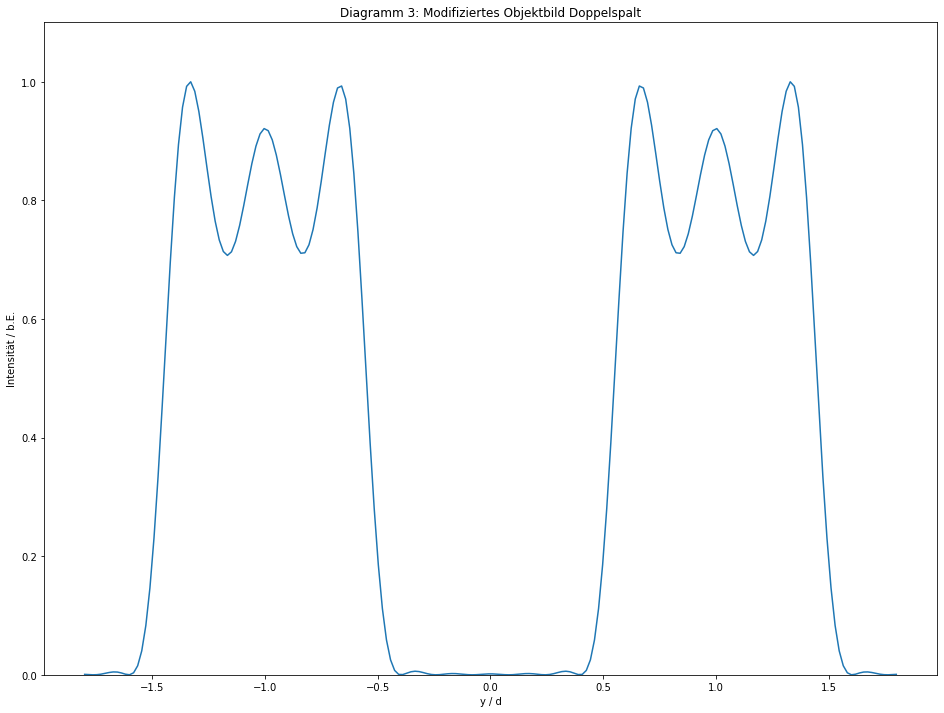

In [74]:
#Doppelspalt

#Integrand
def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2)*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

#Spaltabstand in Einheiten der Spaltbreite
g = 2*d
#Integrfationsbereich
n = 3

#Wähle doppelte Spaltbreite für y-Bereich; y-Werte:
Y = np.linspace(-1.8,1.8,200)*d

#Berechnung der resultierenden Objektbilds
from scipy.integrate import quad
f_modifiziert = []
for i in range(len(Y)):
    y = Y[i]
    result, error = quad(doppelspalt, 0, 2*np.pi*n/d)
    f_modifiziert.append(result**2)

#Kurve auf 1 normieren:
f_modifiziert = f_modifiziert/np.max(f_modifiziert)

plt.figure(figsize=(16,12))
plt.plot(Y, f_modifiziert)
plt.xlabel('y / d')
plt.ylabel('Intensität / b.E.')
plt.title('Diagramm 3: Modifiziertes Objektbild Doppelspalt')
plt.ylim((0,1.1))
#plt.savefig("figures/spalt.pdf", format="pdf")